In [1]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from pandas_profiling import ProfileReport
import sklearn

Wall time: 2.39 s


In [2]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
ProfileReport(df)

In [ ]:
df.head()

In [3]:
x = df.drop(columns= 'quality')
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [4]:
y= df.quality
y.head()


0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 30)

In [6]:
# Actual testing is done on the random dataset
# let's build decision tree model.

In [7]:
dt_model = DecisionTreeClassifier()

In [8]:
dt_model.fit(x_train, y_train)


DecisionTreeClassifier()

In [9]:
%matplotlib inline

[Text(614.1652981762428, 1057.0, 'X[10] <= 10.35\ngini = 0.642\nsamples = 1199\nvalue = [8, 35, 512, 477, 153, 14]'),
 Text(362.68461507424144, 996.6, 'X[6] <= 95.5\ngini = 0.528\nsamples = 666\nvalue = [6, 20, 406, 209, 23, 2]'),
 Text(228.0083521626856, 936.2, 'X[9] <= 0.585\ngini = 0.554\nsamples = 584\nvalue = [6, 19, 332, 202, 23, 2]'),
 Text(86.46328276307295, 875.8, 'X[6] <= 90.5\ngini = 0.468\nsamples = 261\nvalue = [3, 14, 179, 63, 2, 0]'),
 Text(60.20384118786314, 815.4000000000001, 'X[10] <= 9.075\ngini = 0.453\nsamples = 250\nvalue = [3, 14, 176, 55, 2, 0]'),
 Text(19.21239509360878, 755.0, 'X[6] <= 39.0\ngini = 0.604\nsamples = 15\nvalue = [0, 2, 6, 7, 0, 0]'),
 Text(7.684958037443512, 694.6, 'X[8] <= 3.38\ngini = 0.406\nsamples = 8\nvalue = [0, 1, 1, 6, 0, 0]'),
 Text(3.842479018721756, 634.2, 'gini = 0.0\nsamples = 6\nvalue = [0, 0, 0, 6, 0, 0]'),
 Text(11.527437056165269, 634.2, 'X[7] <= 0.997\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1, 0, 0, 0]'),
 Text(7.6849580374435

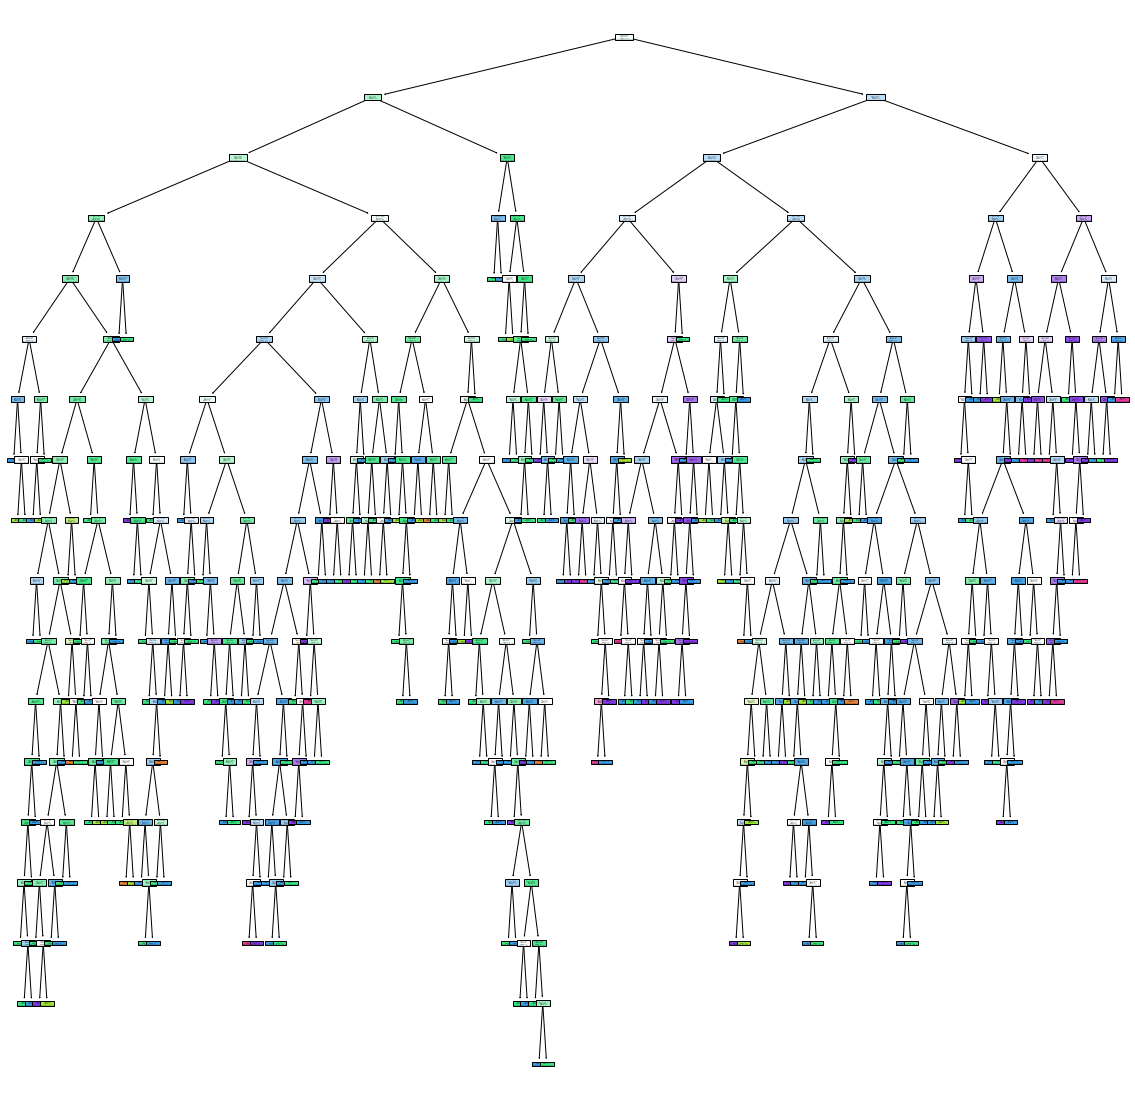

In [10]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model,  filled = True)

In [11]:
df1 = df.head(500)

In [12]:
x1 = df1.drop(columns = ['quality'])
y1= df1.quality


In [13]:
dt_model_1  = DecisionTreeClassifier()
dt_model_1.fit(x1,y1)

DecisionTreeClassifier()

[Text(149.0226866883117, 211.4, 'alcohol <= 9.85\ngini = 0.624\nsamples = 500\nvalue = [1, 16, 239, 184, 52, 8]\nclass = 5'),
 Text(92.20199443413729, 199.32, 'total sulfur dioxide <= 62.5\ngini = 0.504\nsamples = 259\nvalue = [1, 12, 167, 72, 6, 1]\nclass = 5'),
 Text(59.55278293135436, 187.24, 'citric acid <= 0.415\ngini = 0.576\nsamples = 169\nvalue = [1, 9, 91, 61, 6, 1]\nclass = 5'),
 Text(27.175324675324674, 175.16, 'alcohol <= 9.05\ngini = 0.525\nsamples = 131\nvalue = [0, 8, 81, 39, 3, 0]\nclass = 5'),
 Text(7.453803339517625, 163.07999999999998, 'sulphates <= 0.54\ngini = 0.403\nsamples = 12\nvalue = [0, 2, 1, 9, 0, 0]\nclass = 6'),
 Text(4.969202226345083, 151.0, 'pH <= 3.43\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1, 0, 0, 0]\nclass = 4'),
 Text(2.4846011131725416, 138.92000000000002, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0, 0, 0]\nclass = 4'),
 Text(7.453803339517625, 138.92000000000002, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0]\nclass = 5'),
 Text(9.9384

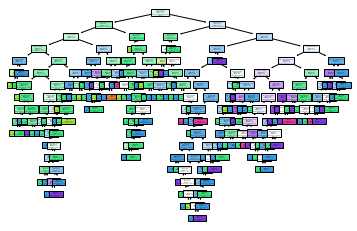

In [14]:
tree.plot_tree(dt_model_1, filled=True, class_names = [str(i) for i in set(y1)], feature_names = x1.columns )

In [15]:
plt.savefig('plt_figure')

<Figure size 432x288 with 0 Axes>

### Tree Pruning

In [16]:
dt_model_1.predict(x1)
dt_model_1.score(x1,y1)

1.0

In [17]:
dt_model_1.score(x_test, y_test)

0.6

In [18]:
path = dt_model_1.cost_complexity_pruning_path(x1,y1)
path

{'ccp_alphas': array([0.        , 0.00166667, 0.00175   , 0.00181818, 0.00184615,
        0.00188235, 0.00192308, 0.002     , 0.002     , 0.002     ,
        0.002     , 0.002     , 0.002     , 0.002     , 0.002     ,
        0.002     , 0.002     , 0.00203333, 0.00247552, 0.00261111,
        0.00262769, 0.00266667, 0.00266667, 0.00266667, 0.00266667,
        0.00266667, 0.00266667, 0.00266667, 0.00266667, 0.00272222,
        0.00285714, 0.003     , 0.003     , 0.003     , 0.003     ,
        0.00304762, 0.00305051, 0.00308418, 0.00325   , 0.00328205,
        0.00333333, 0.00333333, 0.00334032, 0.00336606, 0.00342857,
        0.00343316, 0.0035    , 0.0035    , 0.0036    , 0.00363636,
        0.00373333, 0.00373809, 0.0038    , 0.0038237 , 0.004     ,
        0.00404444, 0.00428571, 0.00428571, 0.00437662, 0.00462338,
        0.00465709, 0.00466667, 0.0048    , 0.00487179, 0.00504242,
        0.00508235, 0.00509091, 0.00510606, 0.00516667, 0.00568485,
        0.00589394, 0.00656364, 0.

In [19]:
ccp_alpha = path['ccp_alphas']

In [20]:
ccp_alpha

array([0.        , 0.00166667, 0.00175   , 0.00181818, 0.00184615,
       0.00188235, 0.00192308, 0.002     , 0.002     , 0.002     ,
       0.002     , 0.002     , 0.002     , 0.002     , 0.002     ,
       0.002     , 0.002     , 0.00203333, 0.00247552, 0.00261111,
       0.00262769, 0.00266667, 0.00266667, 0.00266667, 0.00266667,
       0.00266667, 0.00266667, 0.00266667, 0.00266667, 0.00272222,
       0.00285714, 0.003     , 0.003     , 0.003     , 0.003     ,
       0.00304762, 0.00305051, 0.00308418, 0.00325   , 0.00328205,
       0.00333333, 0.00333333, 0.00334032, 0.00336606, 0.00342857,
       0.00343316, 0.0035    , 0.0035    , 0.0036    , 0.00363636,
       0.00373333, 0.00373809, 0.0038    , 0.0038237 , 0.004     ,
       0.00404444, 0.00428571, 0.00428571, 0.00437662, 0.00462338,
       0.00465709, 0.00466667, 0.0048    , 0.00487179, 0.00504242,
       0.00508235, 0.00509091, 0.00510606, 0.00516667, 0.00568485,
       0.00589394, 0.00656364, 0.00671079, 0.0067591 , 0.00688

In [21]:
# Based on that we are supposed to the pruning of the decision tree.
dt_model2 = []
for ccp in ccp_alpha:
    dt_m = DecisionTreeClassifier(ccp_alpha=ccp)
    dt_m.fit(x1,y1)
    dt_model2.append(dt_m)

In [22]:
train_score = [i.score(x1,y1) for i in dt_model2]

In [23]:
test_score = [i.score(x_test, y_test) for i in dt_model2]

In [24]:
train_score

[1.0,
 1.0,
 0.996,
 0.994,
 0.992,
 0.99,
 0.986,
 0.964,
 0.962,
 0.962,
 0.96,
 0.962,
 0.962,
 0.96,
 0.964,
 0.962,
 0.964,
 0.96,
 0.962,
 0.95,
 0.948,
 0.93,
 0.932,
 0.932,
 0.93,
 0.928,
 0.93,
 0.932,
 0.93,
 0.928,
 0.926,
 0.91,
 0.918,
 0.916,
 0.914,
 0.908,
 0.916,
 0.914,
 0.91,
 0.902,
 0.898,
 0.898,
 0.9,
 0.894,
 0.888,
 0.886,
 0.882,
 0.884,
 0.882,
 0.876,
 0.878,
 0.87,
 0.868,
 0.862,
 0.858,
 0.854,
 0.848,
 0.856,
 0.852,
 0.848,
 0.834,
 0.818,
 0.824,
 0.824,
 0.804,
 0.802,
 0.794,
 0.79,
 0.786,
 0.784,
 0.78,
 0.776,
 0.776,
 0.772,
 0.768,
 0.762,
 0.758,
 0.742,
 0.728,
 0.718,
 0.698,
 0.69,
 0.682,
 0.676,
 0.676,
 0.636,
 0.596,
 0.596,
 0.596,
 0.596,
 0.478]

In [25]:
test_score

[0.595,
 0.58,
 0.5925,
 0.5775,
 0.59,
 0.5825,
 0.585,
 0.5875,
 0.59,
 0.585,
 0.5925,
 0.5975,
 0.5775,
 0.6,
 0.6075,
 0.5875,
 0.605,
 0.5825,
 0.5975,
 0.585,
 0.59,
 0.6175,
 0.6025,
 0.5875,
 0.595,
 0.605,
 0.6275,
 0.6,
 0.61,
 0.5925,
 0.5975,
 0.6175,
 0.6025,
 0.6175,
 0.58,
 0.58,
 0.595,
 0.59,
 0.5975,
 0.6125,
 0.595,
 0.6025,
 0.605,
 0.6025,
 0.615,
 0.62,
 0.61,
 0.6,
 0.605,
 0.6075,
 0.6125,
 0.61,
 0.62,
 0.6125,
 0.6125,
 0.6025,
 0.6075,
 0.6075,
 0.6075,
 0.615,
 0.6075,
 0.605,
 0.61,
 0.6025,
 0.615,
 0.6175,
 0.6075,
 0.6075,
 0.605,
 0.5975,
 0.59,
 0.5875,
 0.5875,
 0.585,
 0.5825,
 0.59,
 0.59,
 0.585,
 0.5825,
 0.5825,
 0.56,
 0.5725,
 0.5625,
 0.555,
 0.555,
 0.54,
 0.5775,
 0.5775,
 0.5775,
 0.5775,
 0.4225]

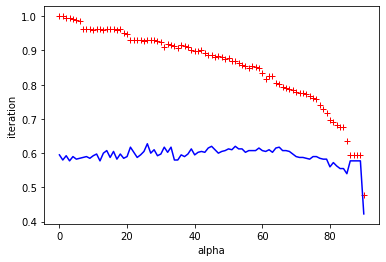

In [26]:
plt.plot(train_score, 'r+', label='train')
plt.plot(test_score, 'b-', label='Validation')
plt.xlabel('alpha')
plt.ylabel('iteration')
plt.show()

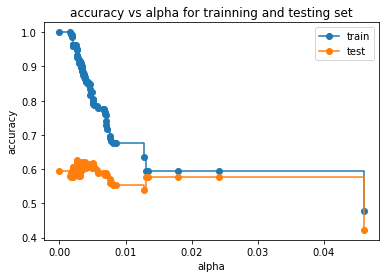

In [27]:
fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('accuracy vs alpha for trainning and testing set')
ax.plot(ccp_alpha, train_score, marker='o', label= 'train', drawstyle='steps-post')
ax.plot(ccp_alpha, test_score, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

In [28]:
org_model = DecisionTreeClassifier(ccp_alpha=0.2)
org_model.fit(x1, y1)

DecisionTreeClassifier(ccp_alpha=0.2)

plt.figure(figsize=(20,20))

In [29]:
org_model.score(x1,y1)

0.478

In [30]:
org_model.score(x_test, y_test)

0.4225

In [31]:
grid_parameter = {
    'criterion':['gini', 'entropy'],
    'splitter' : ['best', 'random'],
    'max_depth' : range(2,10,1),
    'min_samples_leaf' : range(1, 10, 1)
}

In [32]:
grid_ccp = GridSearchCV(estimator = dt_m, param_grid= grid_parameter, cv=5,n_jobs=-1)

In [33]:
grid_ccp.fit(x1,y1)

C:\Users\Sanjeev\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(ccp_alpha=0.046007283807814825),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'min_samples_leaf': range(1, 10),
                         'splitter': ['best', 'random']})

In [34]:
dt_m.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [35]:
# Let's suppose we are giving you 5 billion rows.
"Decision Trees, whole one thing.ipynb"

'Decision Trees, whole one thing.ipynb'

In [38]:
# MultiClass Classification

#  RandomForest Bagging Classifier

In [39]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [40]:
x = df.drop(columns=['quality'])
y = df.quality

In [43]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [45]:
from sklearn.ensemble import BaggingClassifier
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

In [47]:
bag_dt = BaggingClassifier(DecisionTreeClassifier(),n_estimators=100)

In [48]:
bag_dt.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [49]:
bag_dt.predict(x_test)

array([6, 5, 7, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 4, 6, 7, 7, 5, 5, 6, 6, 5,
       6, 7, 5, 5, 5, 7, 5, 6, 6, 6, 6, 5, 7, 7, 5, 5, 6, 6, 5, 7, 6, 7,
       6, 5, 5, 6, 5, 6, 5, 5, 6, 6, 6, 5, 5, 5, 7, 5, 5, 6, 6, 6, 5, 6,
       5, 5, 6, 6, 6, 5, 5, 6, 6, 6, 5, 5, 5, 7, 6, 5, 6, 6, 6, 5, 6, 5,
       5, 5, 5, 6, 6, 5, 7, 6, 6, 5, 5, 6, 7, 6, 6, 6, 5, 5, 5, 5, 6, 5,
       6, 5, 8, 5, 6, 6, 6, 7, 6, 6, 5, 6, 5, 5, 7, 7, 5, 5, 6, 7, 5, 5,
       6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 8, 6, 5, 5, 6, 6, 5, 5,
       6, 6, 6, 6, 6, 6, 6, 6, 7, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 7, 5, 6,
       7, 7, 7, 5, 5, 7, 6, 6, 7, 5, 6, 6, 5, 6, 6, 5, 6, 6, 5, 5, 5, 5,
       6, 5, 5, 6, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5, 6, 6, 7, 6, 5,
       5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6, 5, 5, 7, 6, 6, 7, 7, 6, 5, 5,
       5, 5, 6, 5, 5, 5, 5, 7, 5, 5, 5, 5, 5, 6, 5, 5, 5, 7, 6, 6, 5, 6,
       5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 7, 6, 6, 7, 5, 7, 5, 6, 6, 5,
       5, 5, 7, 6, 5, 5, 6, 6, 5, 6, 6, 5, 5, 5, 6,

In [50]:
accuracy_score(y_test, bag_dt.predict(x_test))

0.6875

In [51]:
bag_dt.base_estimator_

DecisionTreeClassifier()

In [52]:
# Identical tree we are trying to create with the boostraping data distributio
bag_dt.estimator_params

()

In [88]:
from sklearn.neighbors import KNeighborsClassifier
bag_knn = BaggingClassifier(KNeighborsClassifier(6), n_estimators=5)
bag_knn.fit(x_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=6),
                  n_estimators=5)

In [61]:
accuracy_score(y_test, bag_knn.predict(x_test))

0.505

In [62]:
bag_knn.predict(x_test)

array([5, 5, 7, 6, 6, 5, 6, 6, 6, 6, 5, 6, 5, 5, 6, 6, 7, 6, 6, 6, 6, 6,
       5, 5, 6, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 7, 6, 5,
       6, 6, 5, 6, 6, 5, 6, 5, 5, 7, 6, 5, 5, 5, 7, 5, 5, 6, 6, 5, 6, 5,
       5, 5, 7, 7, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 7, 6, 6, 6, 6, 5, 6, 6, 6, 5,
       6, 5, 6, 6, 5, 7, 5, 7, 7, 5, 5, 7, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5,
       5, 5, 6, 5, 6, 5, 6, 5, 6, 5, 5, 6, 5, 6, 6, 6, 6, 6, 5, 5, 6, 6,
       5, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 7, 6, 7, 7, 6,
       7, 7, 6, 5, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 6, 6, 6, 5, 5, 6, 6, 6, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 5,
       5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6, 6, 7, 5, 7, 6, 6, 6,
       6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 5, 6, 6, 5,
       5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 6, 6, 7, 6, 6, 7, 6, 6, 5, 7, 5, 5,
       5, 5, 6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6,

In [63]:
# Classifier or regression algorith
from sklearn.ensemble import RandomForestClassifier




In [89]:
rf = RandomForestClassifier(n_estimators=5)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=5)

In [90]:
rf.score(x_test, y_test)

0.635

In [91]:
bag_dt.score(x_test, y_test)

0.6875

In [92]:
bag_knn.score(x_test, y_test)

0.49

In [93]:
# with 10 Base Decision Tree


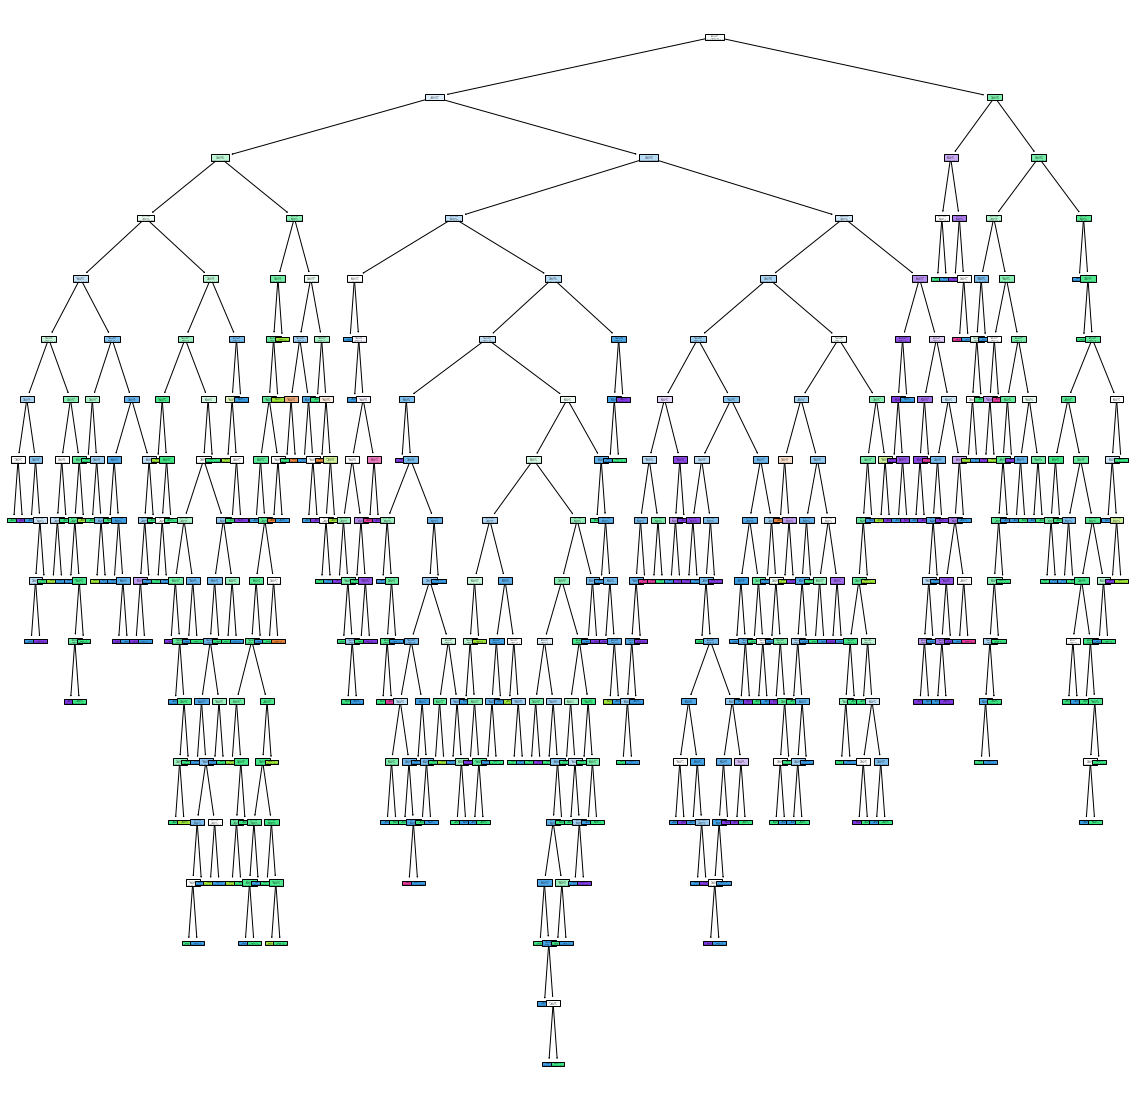

In [102]:
plt.figure(figsize=(20,20))
for i in rf.estimators_:
    tree.plot_tree(i, filled=True)

[Text(501.3380371759891, 1057.0, 'X[9] <= 0.635\ngini = 0.642\nsamples = 758\nvalue = [10, 42, 502, 489, 146, 10]'),
 Text(251.3807128240109, 996.6, 'X[10] <= 10.35\ngini = 0.56\nsamples = 407\nvalue = [8, 29, 364, 226, 21, 0]'),
 Text(99.74027967257844, 936.2, 'X[7] <= 0.996\ngini = 0.449\nsamples = 276\nvalue = [6, 20, 307, 98, 4, 0]'),
 Text(12.180081855388813, 875.8, 'X[10] <= 9.75\ngini = 0.189\nsamples = 27\nvalue = [3, 1, 44, 0, 1, 0]'),
 Text(8.120054570259208, 815.4000000000001, 'gini = 0.0\nsamples = 17\nvalue = [0, 0, 31, 0, 0, 0]'),
 Text(16.240109140518417, 815.4000000000001, 'X[1] <= 0.755\ngini = 0.444\nsamples = 10\nvalue = [3, 1, 13, 0, 1, 0]'),
 Text(8.120054570259208, 755.0, 'X[0] <= 7.25\ngini = 0.142\nsamples = 7\nvalue = [0, 0, 12, 0, 1, 0]'),
 Text(4.060027285129604, 694.6, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 9, 0, 0, 0]'),
 Text(12.180081855388813, 694.6, 'X[8] <= 3.275\ngini = 0.375\nsamples = 2\nvalue = [0, 0, 3, 0, 1, 0]'),
 Text(8.120054570259208, 634.2

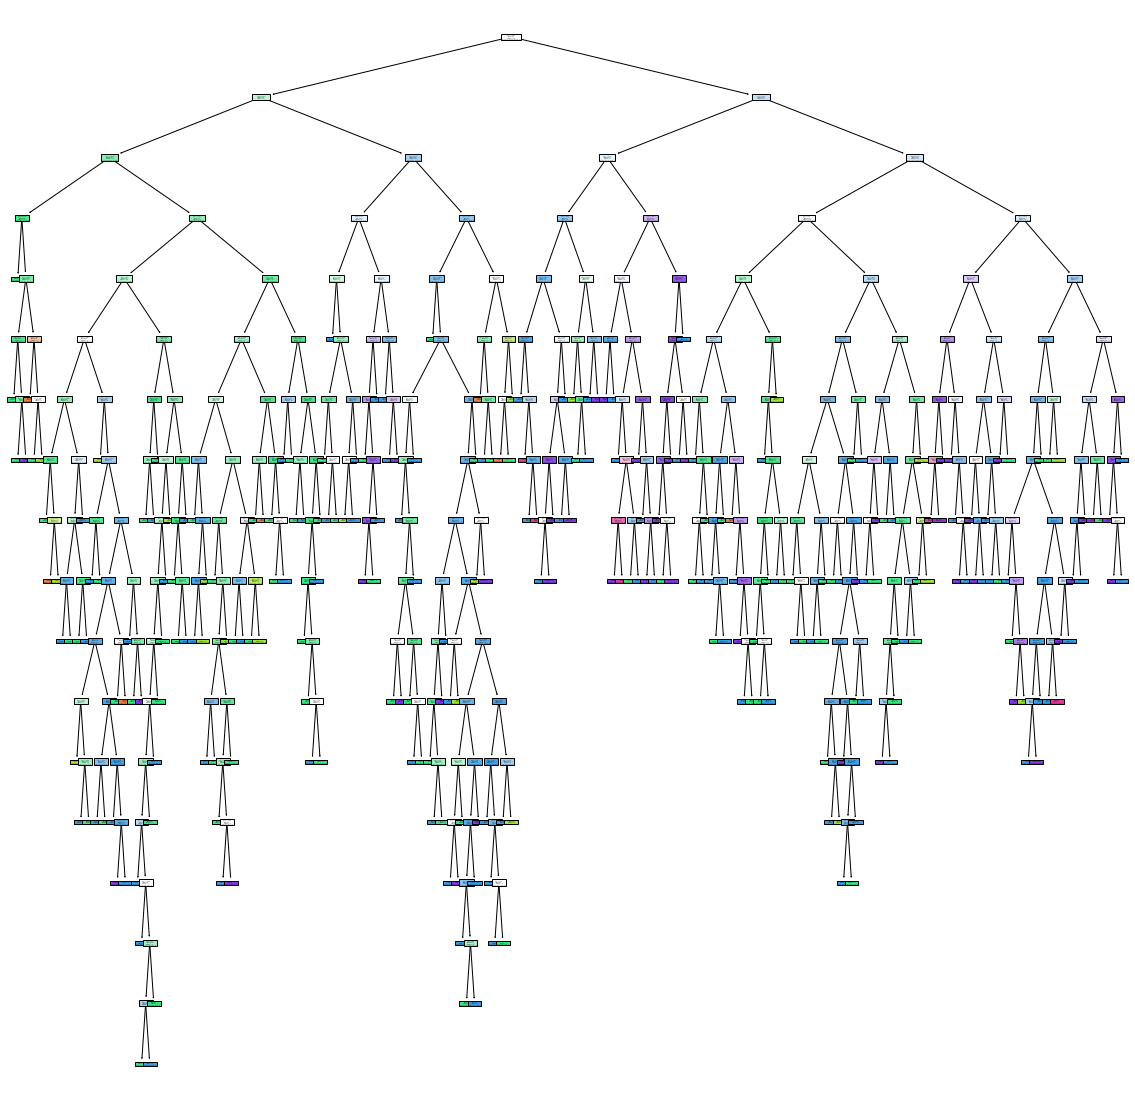

In [98]:
plt.figure(figsize=(20,20))
tree.plot_tree(rf.estimators_[0], filled=True )

[Text(466.97530058983665, 1060.02, 'X[4] <= 0.076\ngini = 0.64\nsamples = 774\nvalue = [11, 33, 531, 459, 151, 14]'),
 Text(224.7095621597096, 1005.6600000000001, 'X[10] <= 10.35\ngini = 0.675\nsamples = 299\nvalue = [1, 14, 153, 189, 89, 9]'),
 Text(95.22583938294011, 951.3000000000001, 'X[7] <= 0.997\ngini = 0.568\nsamples = 124\nvalue = [1, 4, 95, 65, 11, 0]'),
 Text(54.74931941923775, 896.94, 'X[3] <= 1.75\ngini = 0.468\nsamples = 72\nvalue = [1, 3, 73, 25, 4, 0]'),
 Text(21.266787658802176, 842.58, 'X[2] <= 0.385\ngini = 0.206\nsamples = 17\nvalue = [0, 1, 24, 1, 1, 0]'),
 Text(17.215970961887475, 788.22, 'X[8] <= 3.415\ngini = 0.145\nsamples = 16\nvalue = [0, 1, 24, 0, 1, 0]'),
 Text(9.114337568058076, 733.8600000000001, 'X[10] <= 9.1\ngini = 0.087\nsamples = 13\nvalue = [0, 1, 21, 0, 0, 0]'),
 Text(5.063520871143376, 679.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0, 0]'),
 Text(13.165154264972776, 679.5, 'gini = 0.0\nsamples = 12\nvalue = [0, 0, 21, 0, 0, 0]'),
 Text(25.3

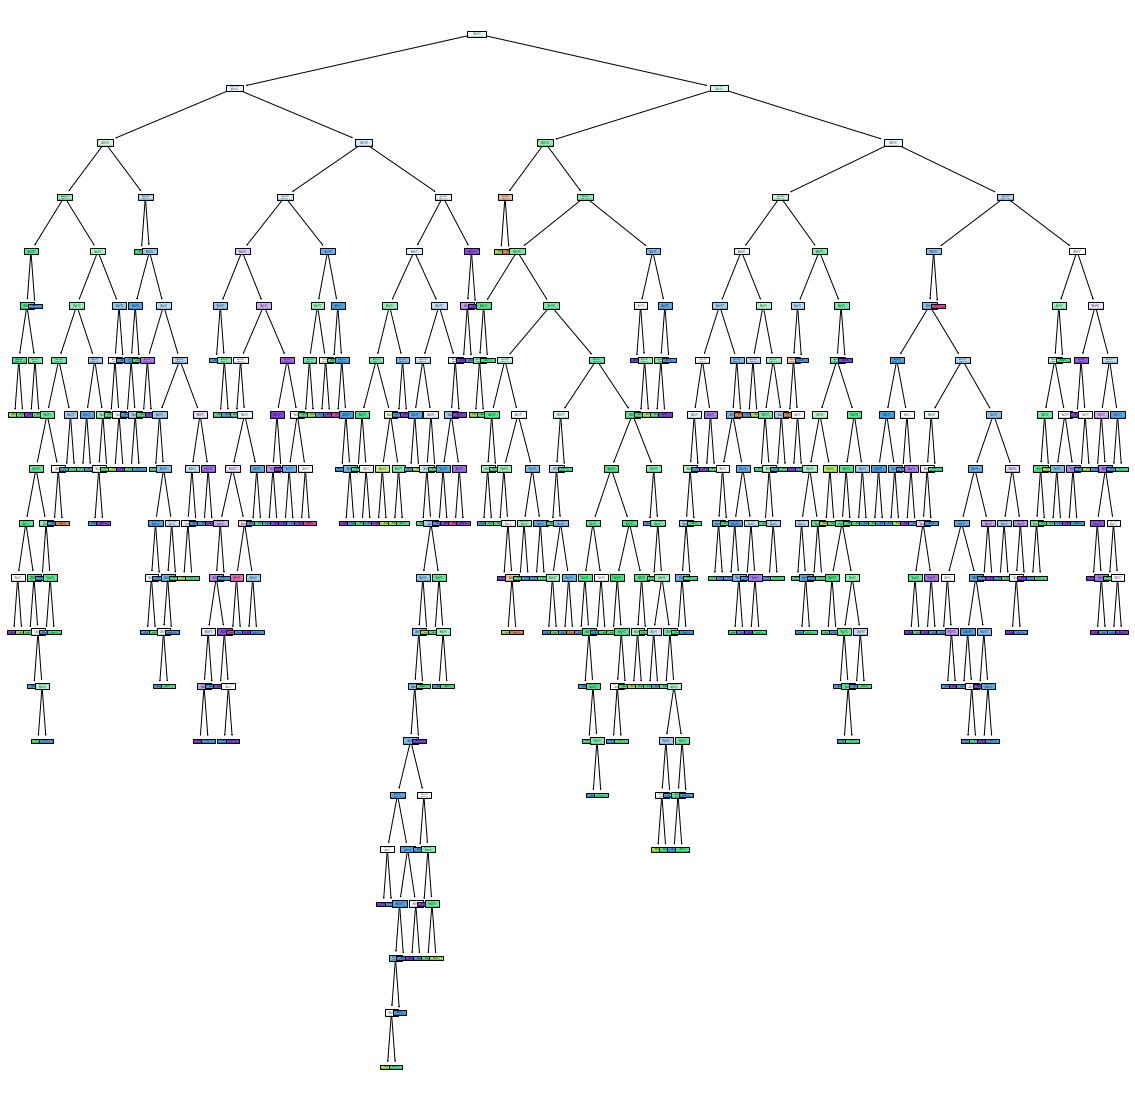

In [99]:
plt.figure(figsize=(20,20))
tree.plot_tree(rf.estimators_[2], filled=True)

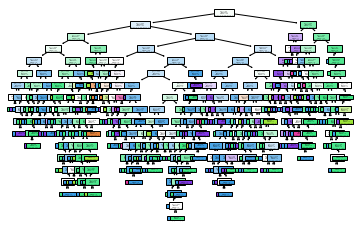

In [103]:
for i in range(len(rf.estimators_)):
    tree.plot_tree(rf.estimators_[i], filled=True)

In [109]:
grid_param = {
    'n_estimators':[5,10,50,100,120,150],
    'criterion': ['gini','entropy'],
    'max_depth':range(10),
    'min_samples_leaf':range(10)
}

In [110]:
grid_search_rf = GridSearchCV(param_grid=grid_param, cv=10, n_jobs= -1, verbose= 1, estimator = rf, )

In [111]:
grid_search_rf.fit(x_train,y_train)

Fitting 10 folds for each of 1200 candidates, totalling 12000 fits


C:\Users\Sanjeev\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Sanjeev\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.63388655 0.61886555 0.61970588]
  warnings.warn(


GridSearchCV(cv=10, estimator=RandomForestClassifier(n_estimators=5), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 10),
                         'min_samples_leaf': range(0, 10),
                         'n_estimators': [5, 10, 50, 100, 120, 150]},
             verbose=1)

In [112]:
grid_search_rf.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=9)

In [113]:
grid_search_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [114]:
rf_new = RandomForestClassifier(criterion= 'entropy', max_depth=9, min_samples_leaf=1, n_estimators = 100)
rf_new.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=9)

In [115]:
rf_new.score(x_test, y_test)

0.675